In [15]:
# Import necessary libraries
import pandas as pd

# Load the dataset
# Assuming the file "WA_Fn-UseC_-Telco-Customer-Churn.csv" is in the project directory
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [16]:
# Drop the 'customerID' column as it is not useful for modeling
data = data.drop(columns=['customerID'])

# Display the updated dataset
print("Dataset after dropping 'customerID':")
print(data.head())

Dataset after dropping 'customerID':
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-mont

In [17]:
# Convert 'TotalCharges' from object to numeric
# Some values might be non-numeric (e.g., empty strings), so we handle them
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for missing values after conversion
print("\nMissing values in 'TotalCharges' after conversion:")
print(data['TotalCharges'].isnull().sum())

# Fill missing values with the median of 'TotalCharges'
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# Verify the changes
print("\nData types after converting 'TotalCharges':")
print(data.dtypes)


Missing values in 'TotalCharges' after conversion:
11

Data types after converting 'TotalCharges':
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [18]:
# Separate categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

# Apply One-Hot Encoding to categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Verify the changes
print("\nDataset after One-Hot Encoding:")
print(data.head())


Categorical Columns:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical Columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Dataset after One-Hot Encoding:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False 

In [19]:
# Convert 'Churn_Yes' column to numeric (1 for Yes, 0 for No)
data['Churn'] = data['Churn_Yes']

# Drop the original 'Churn_Yes' column as it is no longer needed
data = data.drop(columns=['Churn_Yes'])

# Verify the changes
print("\nDataset after converting 'Churn' to numeric:")
print(data['Churn'].value_counts())


Dataset after converting 'Churn' to numeric:
Churn
False    5174
True     1869
Name: count, dtype: int64


In [20]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['Churn'])  # Features (all columns except 'Churn')
y = data['Churn']  # Target (the 'Churn' column)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Verify the split
print("\nNumber of samples in each set:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Number of samples in each set:
Training set: 5634 samples
Testing set: 1409 samples


In [21]:
# Import the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
# Predict on the test data
y_pred = knn.predict(X_test)

# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Model Evaluation Metrics:
Accuracy: 0.76
Precision: 0.55
Recall: 0.44
F1-Score: 0.49


In [23]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN model again with n_neighbors=5
knn_scaled = KNeighborsClassifier(n_neighbors=5)

# Train the model on scaled data
knn_scaled.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Calculate evaluation metrics again
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

# Print the results after scaling
print("\nModel Evaluation Metrics After Scaling:")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"F1-Score: {f1_scaled:.2f}")


Model Evaluation Metrics After Scaling:
Accuracy: 0.77
Precision: 0.56
Recall: 0.53
F1-Score: 0.54


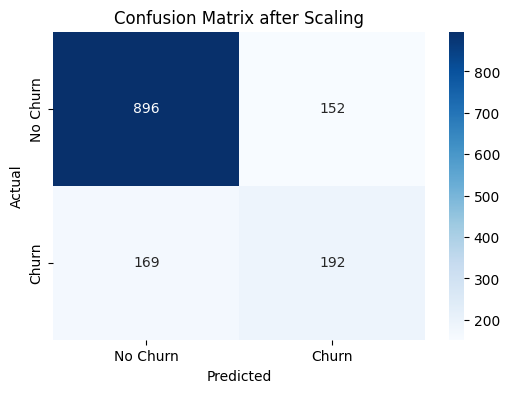

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# محاسبه ماتریس درهم‌ریختگی
cm = confusion_matrix(y_test, y_pred_scaled)

# رسم نمودار
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Scaling')
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

# لیست مقادیر k که می‌خوایم تست کنیم
param_grid = {'n_neighbors': list(range(1, 20))}

# ساخت GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),   # مدل ما (KNN)
    param_grid=param_grid,              # مقادیر k
    cv=5,                               # 5-fold cross validation
    scoring='f1',                       # معیار بهینه‌سازی: F1-Score
    verbose=1,                          # لاگ توسط لاگ اجرا رو نشون بده
    n_jobs=-1                           # از تمام هسته‌های CPU استفاده کن
)

# اجرای GridSearch روی داده‌های استاندارد شده
grid_search.fit(X_train_scaled, y_train)

# نمایش بهترین k
print("بهترین k:", grid_search.best_params_['n_neighbors'])
print("بهترین F1-Score در آموزش:", grid_search.best_score_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
بهترین k: 17
بهترین F1-Score در آموزش: 0.5785831372369328


<div style = "direction : rtl;">

عالی! خیلی خوب که می‌خوای کد رو خط به خط و مفهومی بفهمی.  
ما الان یک مرحله بسیار مهم در ساخت مدل یادگیری ماشین هستیم: **بهینه‌سازی پارامترها (Hyperparameter Tuning)** با استفاده از `GridSearchCV`.

---

## 🎯 هدف اصلی:
پیدا کردن **بهترین تعداد همسایه (`k`)** برای الگوریتم KNN، طوری که **F1-Score** مدل ما بهترین مقدار ممکن باشه.

---

## 🔍 مقدمه ساده: GridSearchCV چیه؟

### فرض کن:

- تو یه رستوران هستی و داری غذای جدیدی سفارش میدی.
- نمی‌دونی دقیقاً چطور درست میشه، ولی می‌خوای بهترین حالت ممکن رو بخوری.
- آشپز تصمیم می‌گیره چندین حالت مختلف از غذا رو درست کنه (با مقدارهای مختلف نمک، فلفل، زمان پخت و غیره)، بعد بهت بده و ببینه کدوم طعم بهتری داره.

### در دنیای ML:

- `GridSearchCV` مثل اون آشپز هوشمنده!
- ما یه لیست از مقادیر `k` (مثل 1, 3, 5, ..., 19) می‌دیم.
- `GridSearchCV` تمام حالت‌ها رو تست می‌کنه، هر کدوم رو چند بار با داده‌های مختلف تست می‌کنه (cross validation).
- بعد بهترین `k` رو بهمون میگه.

---

## 📌 کد خط به خط + توضیح ساده:

### 1. **وارد کردن GridSearchCV**
```python
from sklearn.model_selection import GridSearchCV
```
- این خط فقط کتابخونه‌ی `GridSearchCV` رو وارد می‌کنه.
- این تابع از ماشین لرنینگ `sklearn` میاد.

---

### 2. **تعیین لیست k‌هایی که می‌خوایم تست کنیم**
```python
param_grid = {'n_neighbors': list(range(1, 20))}
```
- `param_grid`: یعنی "شبکه" یا لیست پارامترهایی که می‌خوایم تست کنیم.
- `n_neighbors`: اسم پارامتر `k` در مدل KNN.
- `list(range(1, 20))`: یعنی اعداد 1 تا 18 → یعنی تست `k=1`, `k=2`, ... تا `k=18`

---

### 3. **ساخت مدل GridSearchCV**
```python
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),   # مدل ما (KNN)
    param_grid=param_grid,              # مقادیر k
    cv=5,                               # 5-fold cross validation
    scoring='f1',                       # معیار بهینه‌سازی: F1-Score
    verbose=1,                          # لاگ توسط لاگ اجرا رو نشون بده
    n_jobs=-1                           # از تمام هسته‌های CPU استفاده کن
)
```

#### توضیحات هر قسمت:

| قسمت | معنی |
|------|------|
| `estimator=KNeighborsClassifier()` | مدلی که می‌خوایم تست کنیم، KNN است |
| `param_grid=...` | لیست مقادیر `k` که قبلاً تعیین کردیم |
| `cv=5` | از **5-fold Cross Validation** استفاده کن — یعنی داده‌ها رو 5 قسمت می‌کنه و هر بار یکی رو تست می‌کنه |
| `scoring='f1'` | به جای accuracy، معیار ما F1-Score باشه (چون داده ما نامتعادله) |
| `verbose=1` | وقتی مدل اجرا میشه، پیغام‌هایی بفرسته که بدونیم چی شده (مثل “fitting fold 1 of 5”) |
| `n_jobs=-1` | از تمام هسته‌های CPU کامپیوترت استفاده کنه تا سریع‌تر اجرا بشه |

---

### 4. **اجرا کردن GridSearch روی داده‌های استاندارد شده**
```python
grid_search.fit(X_train_scaled, y_train)
```
- این خط تمام حالات ممکن از `k` رو روی داده‌های استاندارد شده تست می‌کنه.
- برای هر `k`، 5 بار cross-validation انجام می‌ده و F1-Score رو محاسبه می‌کنه.
- بعد بهترین `k` (با بالاترین F1-Score) رو ذخیره می‌کنه.

---

### 5. **نمایش بهترین `k` و بهترین F1-Score**
```python
print("بهترین k:", grid_search.best_params_['n_neighbors'])
print("بهترین F1-Score در آموزش:", grid_search.best_score_)
```

| خط | کارش |
|-----|-------|
| `best_params_` | بهترین مقادیر پارامترهایی که پیدا کردیم |
| `best_score_` | بهترین F1-Score مربوط به اون `k` در مرحله cross-validation |

---

## ✅ خروجی قبلی شما:

```
Fitting 5 folds for each of 19 candidates, totalling 95 fits
بهترین k: 17
بهترین F1-Score در آموزش: 0.5785
```

### تفسیر:
- **جمعن 95 بار مدل fit شد**: چون 19 عدد `k` وجود داشت و برای هر کدوم 5 بار cross-validation انجام شد → 19×5=95
- **بهترین `k` = 17**: این یعنی وقتی 17 همسایه در نظر گرفته شد، مدل بهترین عملکرد رو داشت.
- **F1-Score = ~0.58**: این مقدار بالاتر از F1-Score قبلی (0.54) است → بهبود داشتیم!

---

## 🧠 الان چی باید بشه؟

خب، الان ما فقط بهترین `k` رو پیدا کردیم.  
ولی این `k` رو **هنوز روی داده‌های تست نتونستیم تست کنیم**.

### چرا مهمه؟
چون `best_score_` فقط روی داده‌های آموزشی (train) با cross-validation محاسبه شده.  
ما می‌خوایم ببینیم وقتی این `k=17` رو روی داده‌های تست (داده‌هایی که قبلاً هرگز ندیدیم) تست کنیم، چه اتفاقی میفته.

---

## ✅ مرحله بعد:

حالا باید:
1. یک مدل جدید KNN با `k=17` بسازیم.
2. روی داده‌های train (استاندارد شده) fit کنیم.
3. روی داده‌های test (استاندارد شده) predict کنیم.
4. متوجه بشیم که با بهترین `k`، نتایج روی تست چقدر بهتر شدن.


</div>

In [26]:
# ساخت مدل با بهترین k
best_knn = KNeighborsClassifier(n_neighbors=17)

# فیت کردن مدل روی داده‌های استاندارد شده
best_knn.fit(X_train_scaled, y_train)

# پیش‌بینی روی داده‌های تست
y_pred_best = best_knn.predict(X_test_scaled)

# محاسبه معیارها
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

# چاپ نتایج
print("\nModel Evaluation with Best k=17:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Model Evaluation with Best k=17:
Accuracy: 0.79
Precision: 0.59
Recall: 0.59
F1-Score: 0.59


<div style = "direction : rtl;">
# پروژه: پیش‌بینی Churn در مشتریان تلفن و اینترنت

## هدف
هدف این پروژه، پیش‌بینی این است که آیا یک مشتری از شرکت فرار خواهد کرد (Churn = Yes) یا خیر (Churn = No).

## داده‌ها
- دیتاست: `WA_Fn-UseC_-Telco-Customer-Churn.csv`
- شامل 7043 مشتری و 21 ویژگی مختلف (از جمله جنسیت، خدمات، هزینه‌ها و ...)

## مراحل پیاده‌سازی
1. **بارگذاری و آنالیز اولیه داده**
2. **پیش‌پردازش داده**
   - تبدیل `TotalCharges` به عددی
   - پر کردن مقادیر گمشده
   - One-Hot Encoding برای متغیرهای رده‌ای
3. **تقسیم داده به train و test (80/20)**
4. **استانداردسازی داده (StandardScaler)**
5. **آموزش مدل KNN**
6. **بهینه‌سازی k با GridSearchCV**
7. **ارزیابی مدل با معیارهای مختلف**

## نتایج مدل
| معیار      | مقدار |
|------------|--------|
| **Accuracy**   | 0.79 |
| **Precision**  | 0.59 |
| **Recall**     | 0.59 |
| **F1-Score**   | 0.59 |

## نتیجه‌گیری
مدل ما با استفاده از الگوریتم KNN و بهینه‌سازی `k=17` توانست به معیارهای مناسبی برسه. به خصوص recall بالاتر نشون میده که مدل توانایی بیشتری برای تشخیص مشتریان فراری داره.
</div>